In [ ]:
import pandas as pd

df = pd.read_csv("/content/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
from scipy.stats import ttest_ind


completed = df[df['test preparation course'] == 'completed']['math score']
not_completed = df[df['test preparation course'] == 'none']['math score']

t_stat, p_val = ttest_ind(completed, not_completed, equal_var=False)  # Welch's t-test

print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.4f}")


T-statistic: 5.787, P-value: 0.0000


In [ ]:
t_stat_r, p_val_r = ttest_ind(
    df[df['test preparation course'] == 'completed']['reading score'],
    df[df['test preparation course'] == 'none']['reading score'],
    equal_var=False
)

t_stat_w, p_val_w = ttest_ind(
    df[df['test preparation course'] == 'completed']['writing score'],
    df[df['test preparation course'] == 'none']['writing score'],
    equal_var=False
)

print(f"Reading - T: {t_stat_r:.3f}, P: {p_val_r:.4f}")
print(f"Writing - T: {t_stat_w:.3f}, P: {p_val_w:.4f}")


Reading - T: 8.004, P: 0.0000
Writing - T: 10.753, P: 0.0000


In [ ]:
corr = df[['math score', 'reading score', 'writing score']].corr()
corr

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


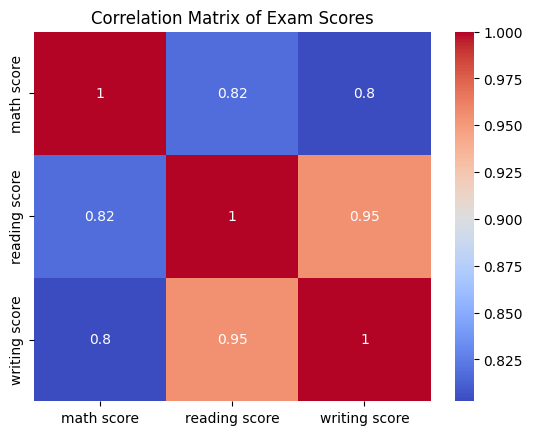

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Exam Scores")
plt.show()


In [ ]:
import statsmodels.formula.api as smf


In [ ]:
import statsmodels.api as sm
df['test prep binary'] = df['test preparation course'].apply(lambda x: 1 if x == 'completed' else 0)

X = df[['reading score', 'test prep binary']]
y = df['math score']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     1007.
Date:                Sun, 11 May 2025   Prob (F-statistic):          5.32e-240
Time:                        11:24:39   Log-Likelihood:                -3584.7
No. Observations:                1000   AIC:                             7175.
Df Residuals:                     997   BIC:                             7190.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.2292      1.343  

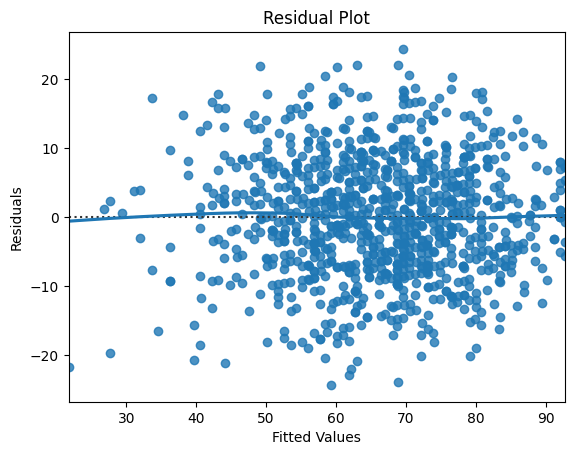

In [ ]:
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
